# 如何在matplotlib中使用颜色

In [1]:
import os

import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

plt.style.use("ggplot")

## 1. 自定义颜色

Matplotlib绘图接口通常包含'color'参数，用于指定颜色，参数接受的数据格式包括：

* 表示颜色的英文单词，如'red', 'green', 'blue'等
* RGB或者RGBA元组，RGBA是(red, blue, green, alpha)的缩小，用包含四个浮点值的数组代表颜色，每个数字的取值范围是$[0, 1]$
* 十六进制RGB或RGBA字符串
* 表示灰度的浮点值字符串，取值范围$[0，1]$，例如'0.5'
* 'bgrcmykw'字符集的其中一个字符，每个字符均表示一种颜色：'b':蓝色，'g':绿色，'r':红色, 'c':青色, 'm':洋红色, 'y':黄色, 'k':黑色,'w':白色
* X11/CSS4颜色名称
* xkcd颜色调查中的名称，以'xkcd：'开头（例如，'xkcd：sky blue'；不区分大小写）
* “T10”分类调色板中的Tableau颜色之一（默认颜色周期）：{'tab：blue'，'tab：orange'，'tab：green'，'tab：red'，'tab：purple'， 'tab：brown'，'tab：pink'，'tab：gray'，'tab：olive'，'tab：cyan'}

对Python开发人员而言，前两种方式应该是最常用的。

查看Matplotlib支持的全部颜色名称：查阅[官方文档](https://matplotlib.org/gallery/color/named_colors.html)。

看一个简单的例子，分别创建曲线图，柱状图，散点图，通过参数'color'指定颜色。

Text(0.5, 1.0, 'Scatter plot: Custom color')

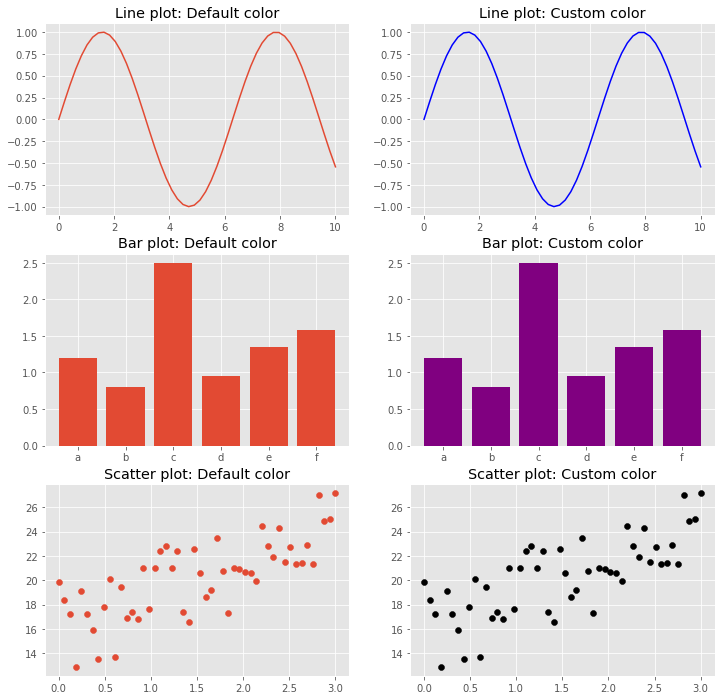

In [2]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
ax = ax.flatten()

# 曲线图
x = np.linspace(0, 10, 50)
y = np.sin(x)
ax[0].plot(x, y)
ax[0].set_title("Line plot: Default color")
ax[1].plot(x, y, color="blue")
ax[1].set_title("Line plot: Custom color")

# 柱状图
x = ["a", "b", "c", "d", "e", "f"]
y = [1.2, 0.8, 2.5, 0.95, 1.35, 1.58]
ax[2].bar(x, y)
ax[2].set_title("Bar plot: Default color")
ax[3].bar(x, y, color="purple")
ax[3].set_title("Bar plot: Custom color")

# 散点图
x = np.linspace(0, 3, 50)
y = 10 + 2.5 * x + np.random.uniform(2, 10, 50)
ax[4].scatter(x, y)
ax[4].set_title("Scatter plot: Default color")
ax[5].scatter(x, y, c="black")
ax[5].set_title("Scatter plot: Custom color")

'color'既可以设置统一的颜色，也可以单独设置每个元素(每条曲线/每根柱子/每个点)的颜色，这时候需要提供一个表示颜色的数组。

Text(0.5, 1.0, 'Different colors for each bar')

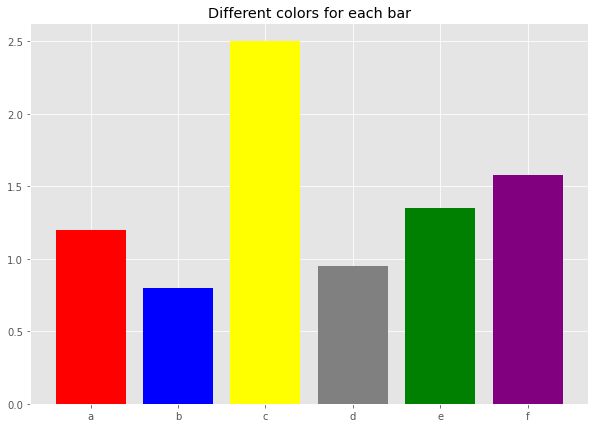

In [3]:
# 以柱状图为例
x = ["a", "b", "c", "d", "e", "f"]
y = [1.2, 0.8, 2.5, 0.95, 1.35, 1.58]

# 表示颜色的数组，这里用字符串表示颜色，也可以使用其它数据格式，如RGB或RGBA元组
colors = ["red", "blue", "yellow", "gray", "green", "purple"]

fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(x, y, color=colors)
ax.set_title("Different colors for each bar")

有时候需要按照某个逻辑条件使用不同的颜色。例如一幅表示不同资产收益率的柱状图，当收益率为正时，柱子颜色设置为绿色，当收益率为负时，柱子颜色为红色。这样做的好处在于突出重点和差异。

实现方法跟上面的例子相似，先根据逻辑条件创建一个颜色数组，然后传递给'color'参数。这时候numpy.where()非常有用。

Text(0.5, 1.0, 'Green bar for positive, Red bar for negative')

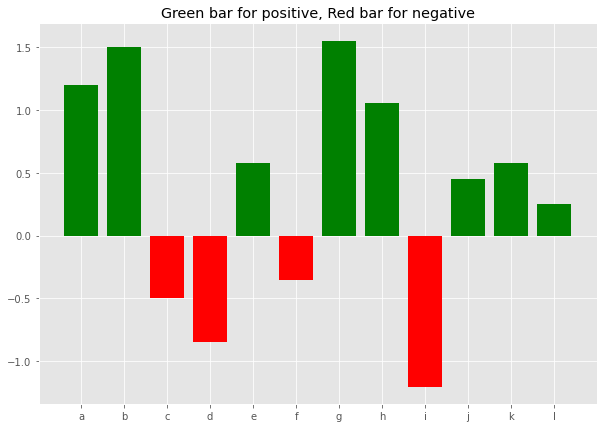

In [4]:
x = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l"]
y = [1.2, 1.5, -0.5, -0.85, 0.58, -0.35, 1.55, 1.05, -1.2, 0.45, 0.58, 0.25]

# y > 0, 柱子颜色为绿色，y < 0, 柱子颜色为红色
# 使用np.where()快速实现向量化判断
colors = np.where(np.array(y) > 0, "green", "red")

fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(x, y, color=colors)
ax.set_title("Green bar for positive, Red bar for negative")

## 2. 调色板(colormap)

调色板(colormap)是一组颜色的集合。Matplotlib提供了很多内置调色板，通过mpl.cm.get_cmap()获取。

想象一下，如果要为100个元素生成不同的颜色，就要准备包含100种颜色的颜色列表，自定义颜色会非常耗费时间，这时候调色板就能解决问题。

合理利用调色板，可以快速按照需求生成颜色列表。

### 2.1 创建调色板，获取颜色

Matplotlib提供了很多内置调色板，通过mpl.cm.get_cmap()获取，提供两个参数，第一个是调色板的名称，另外一个是颜色列表的长度。

In [5]:
# 获取名为'viridis'的调色板，颜色列表长度为8，即包含8种颜色
cmap = mpl.cm.get_cmap("viridis", 8)
# type(cmap)

colormap对象可以理解为一个$N*4$的二维表格，N是颜色列表的长度，每一行都是一个(R, G, B, A)元组，元组中每个元素都是取值$[0, 1]$的数字。

颜色列表存储在colormap.colors属性中。

In [6]:
cmap.colors

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.275191, 0.194905, 0.496005, 1.      ],
       [0.212395, 0.359683, 0.55171 , 1.      ],
       [0.153364, 0.497   , 0.557724, 1.      ],
       [0.122312, 0.633153, 0.530398, 1.      ],
       [0.288921, 0.758394, 0.428426, 1.      ],
       [0.626579, 0.854645, 0.223353, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])

注意并非每一个colormap对象都有colors属性，当colormap是ListedColormap类型，有colors属性，当colormap是ListedSegmentedColormap类型时没有colors属性。

获取颜色列表的另一种方法是“索引”。

In [7]:
# 提供一个数组，长度跟颜色列表长度相同
print(cmap(range(8)))  # [0, 1, 2, ... 7]
print(cmap(np.linspace(0, 1, 8)))  # [0, 0.1428, 0.2857, ..., 1.0]

[[0.267004 0.004874 0.329415 1.      ]
 [0.275191 0.194905 0.496005 1.      ]
 [0.212395 0.359683 0.55171  1.      ]
 [0.153364 0.497    0.557724 1.      ]
 [0.122312 0.633153 0.530398 1.      ]
 [0.288921 0.758394 0.428426 1.      ]
 [0.626579 0.854645 0.223353 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
[[0.267004 0.004874 0.329415 1.      ]
 [0.275191 0.194905 0.496005 1.      ]
 [0.212395 0.359683 0.55171  1.      ]
 [0.153364 0.497    0.557724 1.      ]
 [0.122312 0.633153 0.530398 1.      ]
 [0.288921 0.758394 0.428426 1.      ]
 [0.626579 0.854645 0.223353 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]


从上面代码示例看出，colormap是可调用对象，传递一个$[0, 1]$的浮点值可以从颜色列表中获取一个(R,G,B,A)元组。

为什么任意浮点值可以获取颜色？因为colormap会使用“最近邻插值法”从颜色列表中进行推断，生成一个新的RGBA元组。

In [8]:
cmap(0.3)

(0.212395, 0.359683, 0.55171, 1.0)

之前创建柱状图，自定义了一个颜色列表，现在我们用colormap直接生成一个颜色列表。

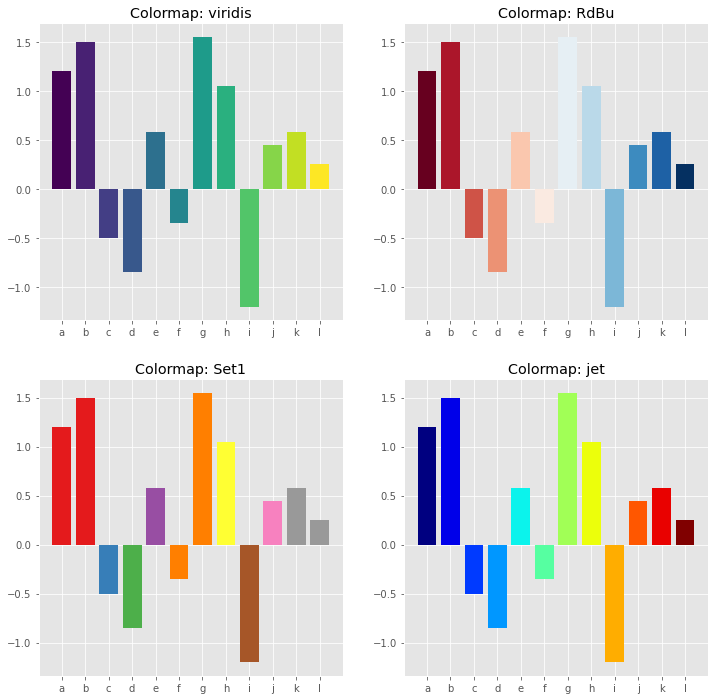

In [9]:
x = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l"]
y = [1.2, 1.5, -0.5, -0.85, 0.58, -0.35, 1.55, 1.05, -1.2, 0.45, 0.58, 0.25]

# 尝试四种不同的调色板，分别生成颜色列表
cmap_names = ["viridis", "RdBu", "Set1", "jet"]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
ax = ax.flatten()

for i, name in enumerate(cmap_names):
    # 创建colormap对象，颜色列表长度和柱子的数量相同
    cmap = mpl.cm.get_cmap(name, len(x))
    # 从调色板中获取颜色列表
    colors = cmap(np.linspace(0, 1, len(x)))
    # 每根柱子赋予不同的颜色
    ax[i].bar(x, y, color=colors)
    ax[i].set_title(f"Colormap: {name}")

### 2.2 调色板类型

我们已经学习了如何创建colormap对象，以及如何获取颜色。接下来要考虑的问题是：

1. Matplotlib提供了哪些内置colormap？
2. 如何选择colormap？

Matplotlib提供3种类型的colormap：

* 顺序（Sequential）：独特颜色的一种变体，用于从低到高变化的定量数据。
* 发散（Divergence）：从一种颜色到另一种颜色的变化，用于突出显示与均值的偏差。
* 定性（Qualitative）：颜色快速变化，主要用于离散或分类数据。

**从分类可以看出，选择哪种调色板取决于数据类型**。

要查看全部调色板，请查阅[官方文档](https://matplotlib.org/tutorials/colors/colormaps.html#sphx-glr-tutorials-colors-colormaps-py)。

In [10]:
def plot_colormap(cmap_name):
    fig, ax = plt.subplots(figsize=(6, 2))
    cmap = mpl.cm.get_cmap(cmap_name)
    colors = cmap(np.linspace(0, 1, cmap.N))
    ax.imshow([colors], extent=[0, 10, 0, 1])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(cmap_name)

顺序调色板, 如'binary', 'viridis'，用于显示从低到高变化的定量数据。

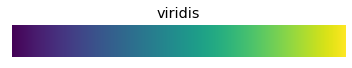

In [11]:
plot_colormap("viridis")

发散调色板，如'RdBu','PuOr'，一种颜色到另一种颜色的快速变化，用于突出数据与均值的偏差。

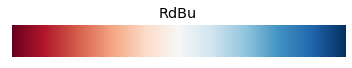

In [12]:
plot_colormap("RdBu")

定性调色板, 如'rainbow', 'jet'，在几种颜色之间快速变化，用于显示定性/分类数据。

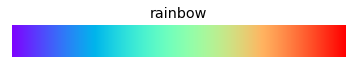

In [13]:
plot_colormap("rainbow")

### 2.3 将数值映射为颜色

有时候我们想把数值映射为颜色，简单来说就是数值大小和颜色亮度等比例变化。

回顾上面的例子，当我们创建柱状图并赋予每根柱子不同的颜色时，是按照顺序从调色板中获取颜色的，颜色的亮度与数值大小并没有关联，现在我们更进一步，根据数值大小生成对应的颜色，这样可以获得更好的可视化效果。

步骤如下：

1. 将数值变量缩放到$[0, 1]$
2. 创建调色板对象(colormap)
3. 从调色板中获取颜色

Text(0.5, 1.0, 'Barplot: Map numeric data to colors')

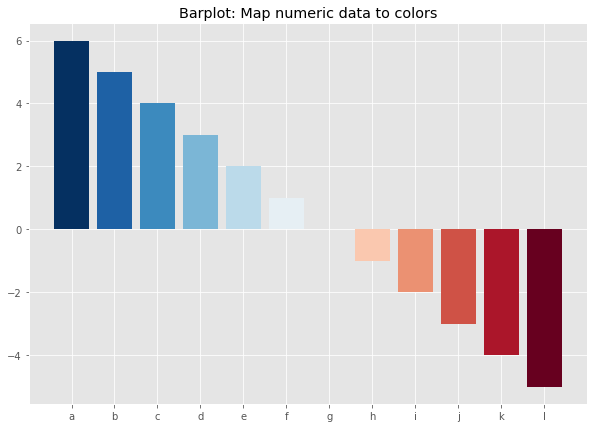

In [14]:
def num2color(values, cmap):
    """将数值映射为颜色"""
    norm = mpl.colors.Normalize(vmin=np.min(values), vmax=np.max(values))
    cmap = mpl.cm.get_cmap(cmap)
    return [cmap(norm(val)) for val in values]


x = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l"]
y = np.arange(6, -6, -1)

colors = num2color(y, "RdBu")

fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(x, y, color=colors)
ax.set_title("Barplot: Map numeric data to colors")

这个映射过程有点麻烦，部分Matplotlib的绘图接口可以自动完成这个过程。

以散点图为例，ax.scatter()的两个参数'c', 'cmap'，分别控制要映射的数值，以及使用的调色板。

Text(0.5, 1.0, 'Scatter: Map numeric data to colors')

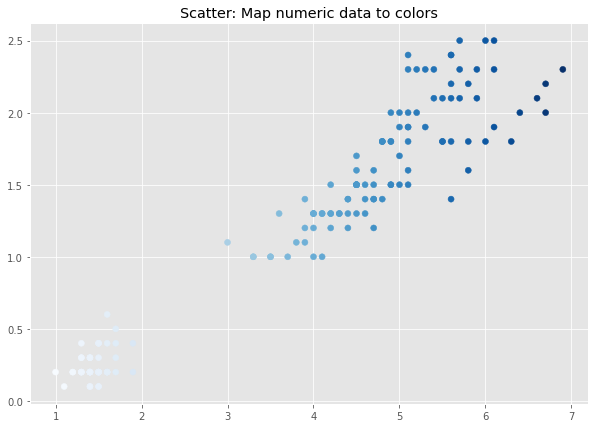

In [15]:
from sklearn.datasets import load_iris

# 使用IRIS数据集做说明
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
# print(iris_df.head())

fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(
    x=iris_df["petal length (cm)"],
    y=iris_df["petal width (cm)"],
    c=iris_df["petal length (cm)"],  # 将petal length映射为颜色
    cmap="Blues"  # 选择调色板，可以提供字符串，也可以提供colormap对象实例
)
ax.set_title("Scatter: Map numeric data to colors")

## 3. 结论

本文介绍了如何在Matplotlib中使用颜色，包含自定义颜色和调色板(colormap)的使用方法。在数据可视化中，正确使用颜色不仅能够使图表更加美观，而且有助于利用视觉效果传达核心信息。